# Detect: Simple Method
Generate forward-modeled intensities using only the AIA response functions

In [11]:
import os
import sys

import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
import matplotlib.colors
import dask
import distributed
import sunpy.map
from astropy.visualization import SqrtStretch,ImageNormalize,AsinhStretch,LogStretch

import synthesizAR
from synthesizAR.instruments import InstrumentSDOAIA
from synthesizAR.visualize import plot_aia_channels

%matplotlib inline

In [2]:
client = distributed.Client()
client

Client Scheduler: tcp://127.0.0.1:46237 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 64 Cores: 64 Memory: 270.38 GB


In [3]:
field = synthesizAR.Field.restore('/storage-home/w/wtb2/data/timelag_synthesis_v2/bundle/field_checkpoint/')

In [4]:
aia = InstrumentSDOAIA([0,3e4] * u.s,)

In [5]:
observer = synthesizAR.Observer(field,[aia],parallel=True)

In [6]:
observer.build_detector_files('/storage-home/w/wtb2/data/timelag_synthesis_v2/bundle/simple/', ds=0.5 * u.Mm,)

/storage-home/w/wtb2/anaconda3/envs/synthesizar/lib/python3.6/site-packages/scipy/interpolate/_fitpack_impl.py:299: RuntimeWarning: The maximal number of iterations (20) allowed for finding smoothing
spline with fp=s has been reached. Probable cause: s too small.
(abs(fp-s)/s>0.001)
  warnings.warn(RuntimeWarning(_iermess[ier][0]))
/storage-home/w/wtb2/anaconda3/envs/synthesizar/lib/python3.6/site-packages/scipy/interpolate/_fitpack_impl.py:299: RuntimeWarning: A theoretically impossible result when finding a smoothing spline
with fp = s. Probable cause: s too small. (abs(fp-s)/s>0.001)
  warnings.warn(RuntimeWarning(_iermess[ier][0]))


In [7]:
tasks_flatten = observer.flatten_detector_counts(interpolate_hydro_quantities=False)

/storage-home/w/wtb2/anaconda3/envs/synthesizar/lib/python3.6/site-packages/distributed/worker.py:739: UserWarning: Large object of size 1.71 MB detected in task graph: 
  (['interpolate_and_store-bbd7b74e7dd8aff1d3127b275 ... AIA_counts.h5')
Consider scattering large objects ahead of time
with client.scatter to reduce scheduler burden and 
keep data on workers

    future = client.submit(func, big_data)    # bad

    big_future = client.scatter(big_data)     # good
    future = client.submit(func, big_future)  # good
  % (format_bytes(len(b)), s))


In [8]:
tasks_bin = observer.bin_detector_counts('/storage-home/w/wtb2/data/timelag_synthesis_v2/bundle/simple/')

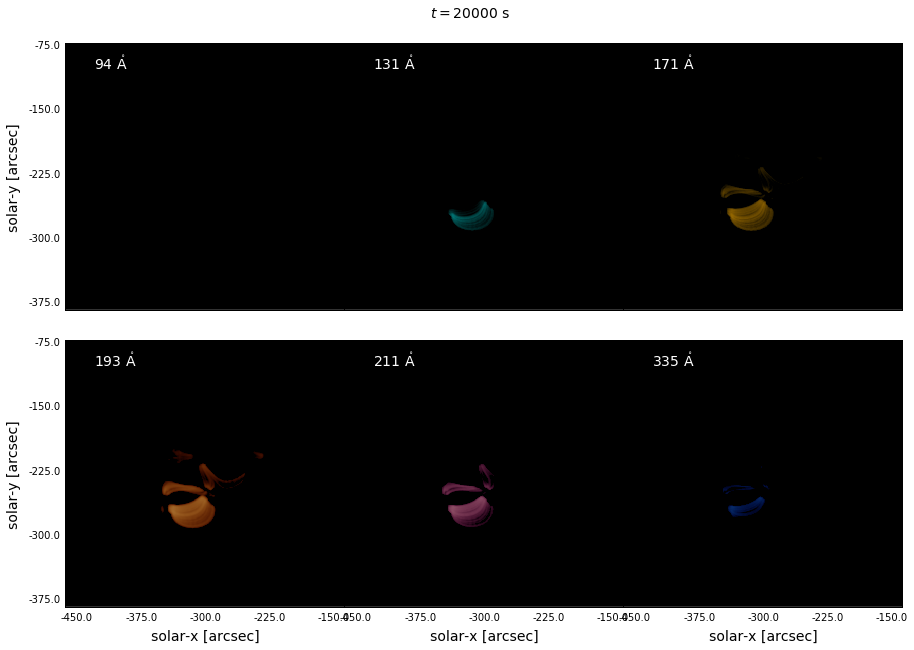

In [35]:
plot_aia_channels(aia, 20e3*u.s, '/storage-home/w/wtb2/data/timelag_synthesis_v2/bundle/simple/',
                  norm=matplotlib.colors.SymLogNorm(1e-100,vmin=1e-3,vmax=1e2)#ImageNormalize(vmin=0,vmax=1e-2,stretch=SqrtStretch())
                 )